Alcohol Involved Driving Deaths to All Driving Deaths in Region 1 of USA
           State  DUI_Death_Rate  Driving_Death_Rate
0  United States             3.3                 9.4
1    Connecticut             2.4                 4.1
2          Maine             3.8                 9.4
3  Massachusetts             1.8                 2.9
4  New Hampshire             2.4                 5.0
5   Rhode Island             2.3                 4.5
6        Vermont             3.4                 8.4


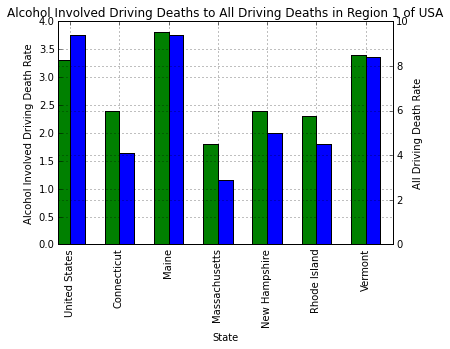

In [6]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
%matplotlib inline

#defining the columns and size of array
columns = ['State', 'DUI_Death_Rate', 'Driving_Death_Rate']
index = np.arange(7)
df = pd.DataFrame(columns=columns, index=index)

#find_data is used to find only the data that is necessary
def find_data( c, first, last ):
    try:
        start = c.index( first ) + len( first )
        end = c.index( last, start )
        return c[start:end]
    except ValueError:
        return ""
counter = 0

#open file of Alcohol Involved Deaths
with open("Impaired_All.rdf") as a:
    for line in a:

#finding the states in file
        if "<ds:state>" in line:
            StateName = find_data( line, "<ds:state>", "</ds:state>")
            StateName = StateName.rstrip()
#finding the death rate for all ages in file & adding to counter       
        if "<ds:all_ages>" in line:
            allAges = find_data( line, "<ds:all_ages>", "</ds:all_ages>")
            c = df.xs(counter)
            c.State = StateName
            c.DUI_Death_Rate = allAges
            c.Driving_Death_Rate = 0
            counter += 1

#open file of all driving deaths in region 1
counter = 0
with open("Occupant_Deaths.rdf") as a:
    for line in a:
#finding the states in file
        if "<ds:state>" in line:
            StateName = find_data( line, "<ds:state>", "</ds:state>")
            StateName = StateName.rstrip()
#finding the death rate for all ages in file & adding to counter  
        if "<ds:all_ages>" in line:
            allAgeDeath = find_data( line, "<ds:all_ages>", "</ds:all_ages>")
            allAgeDeath = float(allAgeDeath)
            c = df.xs(counter)
            c.Driving_Death_Rate = allAgeDeath
            counter += 1

#setting rates to type of float
df.DUI_Death_Rate = df.DUI_Death_Rate.astype(float)
df.Driving_Death_Rate = df.Driving_Death_Rate.astype(float)

#print array as table
print ('Alcohol Involved Driving Deaths to All Driving Deaths in Region 1 of USA')
print(df)

#configuring graph
fig = plt.figure()
#configure double bar graph
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.3
df.DUI_Death_Rate.plot(kind='bar',color='green',ax=ax,width=width,position=1)
df.Driving_Death_Rate.plot(kind='bar',color='blue',ax=ax2,width=width,position=0)
ax.set_ylabel('Alcohol Involved Driving Death Rate')
ax2.set_ylabel('All Driving Death Rate') 
ax.set_xlabel('State')
plt.title('Alcohol Involved Driving Deaths to All Driving Deaths in Region 1 of USA')
ax.set_xticklabels(df.State)

plt.show();